<a href="https://colab.research.google.com/github/TiagoSpiandorello/Analise_de_portfolio_de_acoes/blob/main/analise_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [328]:
# Importação das bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [329]:
# Extração dos dados de um portfólio de ações do site Yahoo Finance

# PETR4 = Petrobras
# BBDC4 = Bradesco
# ABEV3 = AMBEV
# WEGE3 = Weg
# VALE3 - Vale

tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

bolsas.tail(10)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2021-06-08,28.660000,28.240000,19.590000,34.020000,109.919998
2021-06-09,28.660000,28.100000,19.309999,34.250000,112.199997
2021-06-10,28.680000,28.150000,19.320000,33.930000,111.830002
2021-06-11,28.570000,28.040001,18.940001,34.209999,114.339996
2021-06-14,28.750000,27.920000,19.480000,34.880001,113.720001
2021-06-15,29.030001,27.940001,19.129999,35.459999,111.500000
2021-06-16,29.139999,28.080000,19.090000,34.830002,108.150002
2021-06-17,28.129999,27.959999,19.010000,34.419998,105.900002
2021-06-18,28.190001,27.450001,18.760000,35.080002,108.730003


## Normalização dos dados para base 100

### (P1 / P0) * 100

#### Essa manipulação permite comparar o comportamento das ações em uma situação hipotética em que todas iniciam com valor 100. 

In [404]:
bolsas.iloc[0]

PETR4.SA    28.142263
BBDC4.SA    10.765183
ABEV3.SA     4.187932
WEGE3.SA     2.144630
VALE3.SA    32.089706
Name: 2010-01-04 00:00:00, dtype: float64

<function matplotlib.pyplot.show>

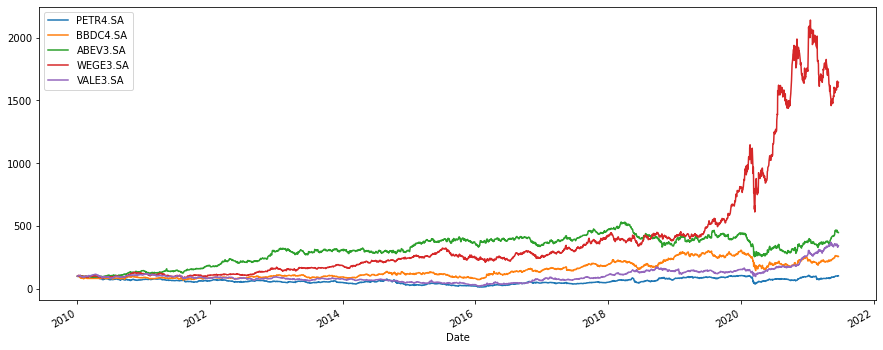

In [407]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize= (15,6));
plt.show

# Taxa de retorno das ações

## Taxa de retorno simples = (preço final - preço inicial) / preço inicial


In [408]:
retorno_simples = (bolsas / bolsas.shift(1)) - 1
retorno_simples.head()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008574,-0.004956,0.005882,-0.002182,0.009322
2010-01-06,0.013513,-0.008000,0.010202,0.005468,0.021166
2010-01-07,-0.009333,-0.002688,0.004695,0.016857,0.004145
2010-01-08,-0.005384,-0.001079,-0.001921,0.036363,0.009758


In [414]:
# Peso é o percentual que cada ação representa no portfólio. 

# No primeiro cenário, as ações estão distribuídas igualmente, cada uma representando 20% do total de ações.

pesos = np.array([0.2,0.2,0.2,0.2,0.2])
np.dot(retorno_simples, pesos)

array([        nan, -0.0001016 ,  0.00846972, ..., -0.0151401 ,
        0.00332802,  0.01018265])

In [410]:
# Retorno anual médio

retorno_anual = retorno_simples.mean() * 250
retorno_anual

PETR4.SA    0.113829
BBDC4.SA    0.142337
ABEV3.SA    0.166866
WEGE3.SA    0.296594
VALE3.SA    0.196825
dtype: float64

In [411]:
np.dot(retorno_anual, pesos)

0.18329029483182352

In [413]:
pfolio1 = str(round(np.dot(retorno_anual, pesos), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio1)

Esta carteira de ações possui um retorno de 18.329 %


In [415]:
# No segundo cenário, as ações não estão distribuídas igualmente, de forma que a WEGE3 representa 40%, a PETR4 10% e as restantes 20% cada do total de ações.
 
pesos2 = np.array([0.1,0.2,0.2,0.4,0.2])
pfolio2 = str(round(np.dot(retorno_anual, pesos2), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio2)

Esta carteira de ações possui um retorno de 23.122999999999998 %


In [417]:
if (pfolio1 > pfolio2):
  print('O primeiro portfólio possui rendimento superior ao segundo.')
elif (pfolio1 < pfolio2):
  print('O segundo portfólio possui rendimento superior ao primeiro.')
else:
  print('Ambos portfólios possuem o mesmo rendimento.')

O segundo portfólio possui rendimento superior ao primeiro.


In [330]:
# Cálculo da taxa de retorno logarítmica das ações

retorno = np.log(bolsas / bolsas.shift(1))
retorno

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279
2010-01-06,0.013423,-0.008032,0.010150,0.005453,0.020945
2010-01-07,-0.009377,-0.002691,0.004684,0.016717,0.004137
2010-01-08,-0.005398,-0.001079,-0.001923,0.035718,0.009711
...,...,...,...,...,...
2021-06-15,0.009692,0.000716,-0.018131,0.016492,-0.019715
2021-06-16,0.003782,0.004998,-0.002093,-0.017926,-0.030505
2021-06-17,-0.035275,-0.004283,-0.004199,-0.011841,-0.021024


## Taxa de retorno logarítmica = log preço final / log preço inicial


In [331]:
acao1 = retorno.columns[0]
acao2 = retorno.columns[1]
acao3 = retorno.columns[2]
acao4 = retorno.columns[3]
acao5 = retorno.columns[4]

In [332]:
media1 = retorno[acao1].mean()
media2 = retorno[acao2].mean()
media3 = retorno[acao3].mean()
media4 = retorno[acao4].mean()
media5 = retorno[acao5].mean()

std1 = retorno[acao1].std()
std2 = retorno[acao1].std()
std3 = retorno[acao1].std()
std4 = retorno[acao1].std()
std5 = retorno[acao1].std()

LOGN_var1 = retorno[acao1].var()
LOGN_var2 = retorno[acao2].var()
LOGN_var3 = retorno[acao2].var()
LOGN_var4 = retorno[acao4].var()
LOGN_var5 = retorno[acao5].var()

print(str(acao1) + "= Retorno Médio: " + str(media1) + " - Desvio Padrão: " + str(std1) + " - Variância: " + str(LOGN_var1))
print(str(acao2) + "= Retorno Médio: " + str(media2) + " - Desvio Padrão: " + str(std2) + " - Variância: " + str(LOGN_var2))
print(str(acao3) + "= Retorno Médio: " + str(media3) + " - Desvio Padrão: " + str(std3) + " - Variância: " + str(LOGN_var3))
print(str(acao4) + "= Retorno Médio: " + str(media4) + " - Desvio Padrão: " + str(std4) + " - Variância: " + str(LOGN_var4))
print(str(acao5) + "= Retorno Médio: " + str(media5) + " - Desvio Padrão: " + str(std5) + " - Variância: " + str(LOGN_var5))

PETR4.SA= Retorno Médio: 9.971017593797104e-06 - Desvio Padrão: 0.029974969173161572 - Variância: 0.0008984987769319866
BBDC4.SA= Retorno Médio: 0.00033263975498928395 - Desvio Padrão: 0.029974969173161572 - Variância: 0.0004738049980070788
ABEV3.SA= Retorno Médio: 0.0005278081558887982 - Desvio Padrão: 0.029974969173161572 - Variância: 0.0004738049980070788
WEGE3.SA= Retorno Médio: 0.000986433582373584 - Desvio Padrão: 0.029974969173161572 - Variância: 0.0004000818043031747
VALE3.SA= Retorno Médio: 0.00043444135489962595 - Desvio Padrão: 0.029974969173161572 - Variância: 0.0007068199159811871


# Índices de ações

### São uma excelente base comparativa para entender como suas ações estão performando.

### Indicam o que esperar se você investir em um portfólio diversificado

In [418]:
# ^BVSP = IBOVESPA - Brasil
# ^GSPC = S&P500 - EUA
# ^IXIC = NASDAQ - EUA
# ^GDAXI = DAX - Alemanha

tickers = ['^GSPC','^IXIC','^GDAXI','^BVSP']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [419]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2015-01-02,2058.199951,4726.810059,9764.730469,48512.0
2015-01-05,2020.579956,4652.569824,9473.160156,47517.0
2015-01-06,2002.609985,4592.740234,9469.660156,48001.0
2015-01-07,2025.900024,4650.470215,9518.179688,49463.0
2015-01-08,2062.139893,4736.189941,9837.610352,49943.0


<function matplotlib.pyplot.show>

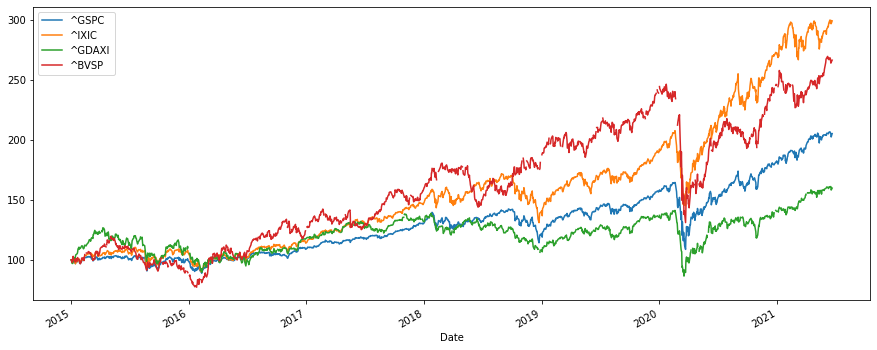

In [421]:
# Normalização dos índices para base 100

(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show

In [422]:
# Retorno simples dos índices

retorno_indices = (ind_data / ind_data.shift(1)) - 1
retorno_indices.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2021-06-15,-0.002012,-0.007145,0.003565,-0.000899
2021-06-16,-0.005390,-0.002358,-0.001205,-0.006396
2021-06-17,-0.000436,0.008666,0.001088,-0.009299
2021-06-18,-0.013124,-0.009248,-0.017779,0.002718
2021-06-21,0.014002,0.007919,0.010047,0.006697


In [424]:
# Retorno anual dos índices

retorno_anual_ind = retorno_indices.mean() * 250
retorno_anual_ind

^GSPC     0.127350
^IXIC     0.189822
^GDAXI    0.088633
^BVSP     0.181264
dtype: float64

# Compara retorno das ações com índices

In [425]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

<function matplotlib.pyplot.show>

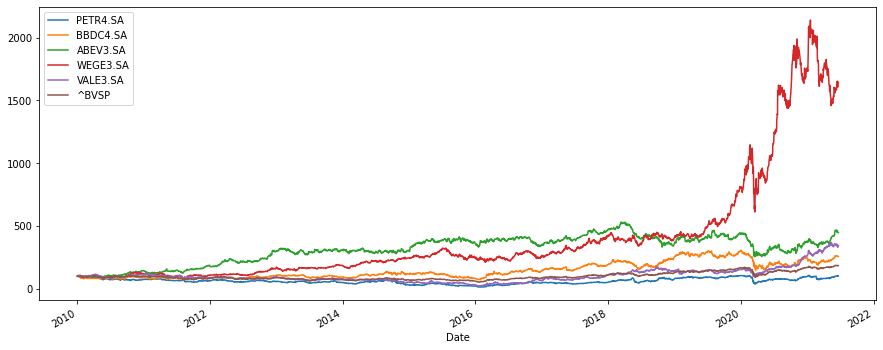

In [426]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize=(15,6));
plt.show

# Cálculo do risco de um ativo

### A volatilidade identifica a variabilidade dos rendimentos. Quanto menor a varição, mais estável e menos risco de perdas.

## Covariância

cov > 0 => variáveis se movem na mesma direção

cov < 0 => variáveis se movem em direções opostas

cov = 0 => variáveis são independentes

In [347]:
cov_matrix = bolsas.cov()
cov_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,33.649399,20.605497,-4.965914,21.814552,75.714303
BBDC4.SA,20.605497,46.562959,20.642447,39.145635,76.645354
ABEV3.SA,-4.965914,20.642447,20.377221,14.311558,10.695243
WEGE3.SA,21.814552,39.145635,14.311558,87.850691,142.802025
VALE3.SA,75.714303,76.645354,10.695243,142.802025,348.003576


In [348]:
cov_matrix = retorno.cov()
cov_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,0.000898,0.000380,0.000170,0.000181,0.000378
BBDC4.SA,0.000380,0.000474,0.000159,0.000149,0.000227
ABEV3.SA,0.000170,0.000159,0.000280,0.000112,0.000121
WEGE3.SA,0.000181,0.000149,0.000112,0.000400,0.000128
VALE3.SA,0.000378,0.000227,0.000121,0.000128,0.000707


## Correlação

corr = 1 => correlação perfeita

corr > 0 => variáveis se movem na mesma direção

corr = -1 => correlação perfeitamente negativa

corr < 0 => variáveis se movem em direções opostas

corr = 0 => variáveis absolutamente independentes

In [349]:
corr_matrix = retorno.corr()
corr_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.582892,0.339493,0.302409,0.474692
BBDC4.SA,0.582892,1.000000,0.436888,0.343042,0.391549
ABEV3.SA,0.339493,0.436888,1.000000,0.334617,0.272183
WEGE3.SA,0.302409,0.343042,0.334617,1.000000,0.240107
VALE3.SA,0.474692,0.391549,0.272183,0.240107,1.000000


<function matplotlib.pyplot.show>

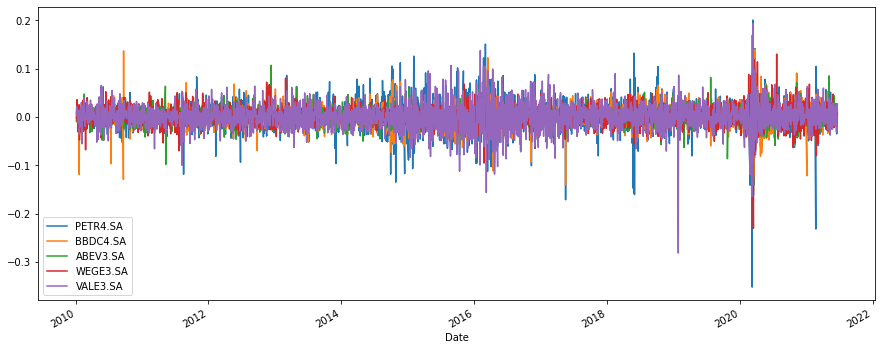

In [350]:
retorno.plot(figsize = (15, 6));
plt.show

In [351]:
corr_matrix = bolsas.corr()
corr_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.520564,-0.189644,0.401222,0.699677
BBDC4.SA,0.520564,1.000000,0.670144,0.612055,0.602107
ABEV3.SA,-0.189644,0.670144,1.000000,0.338253,0.127007
WEGE3.SA,0.401222,0.612055,0.338253,1.000000,0.816714
VALE3.SA,0.699677,0.602107,0.127007,0.816714,1.000000


<function matplotlib.pyplot.show>

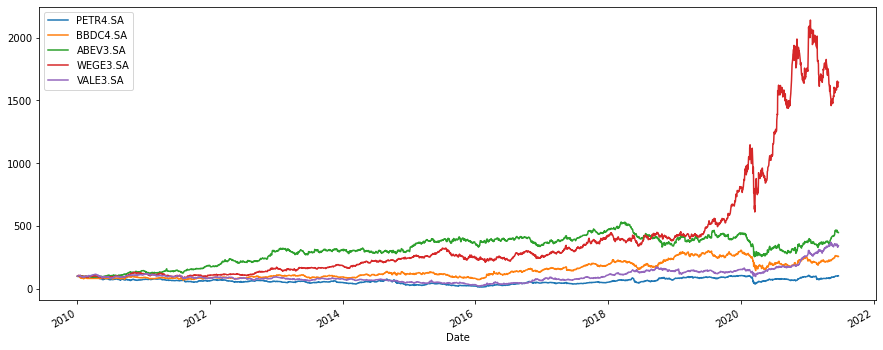

In [352]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

# Otimização de Portfólio de Markowitz

In [353]:
retorno.mean() * 250

PETR4.SA    0.002493
BBDC4.SA    0.083160
ABEV3.SA    0.131952
WEGE3.SA    0.246608
VALE3.SA    0.108610
dtype: float64

In [354]:
retorno.cov() * 250

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,0.224625,0.095080,0.042538,0.045328,0.094573
BBDC4.SA,0.095080,0.118451,0.039752,0.037339,0.056647
ABEV3.SA,0.042538,0.039752,0.069893,0.027977,0.030248
WEGE3.SA,0.045328,0.037339,0.027977,0.100020,0.031921
VALE3.SA,0.094573,0.056647,0.030248,0.031921,0.176705


In [355]:
retorno.corr()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.582892,0.339493,0.302409,0.474692
BBDC4.SA,0.582892,1.000000,0.436888,0.343042,0.391549
ABEV3.SA,0.339493,0.436888,1.000000,0.334617,0.272183
WEGE3.SA,0.302409,0.343042,0.334617,1.000000,0.240107
VALE3.SA,0.474692,0.391549,0.272183,0.240107,1.000000


In [356]:
num_tickers = len(tickers)
num_tickers

5

In [357]:
weights = np.random.random(num_tickers)
weights /= np.sum(weights)
weights

array([0.11786417, 0.13269881, 0.27816981, 0.31188992, 0.1593773 ])

In [358]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

1.0

# Retorno esperado do Portfólio

In [359]:
np.sum(weights * retorno.mean()) * 250

0.1422587995858655

# Variância esperada do Portfólio

In [360]:
np.dot(weights.T, np.dot(retorno.cov() *250, weights))

0.05661323325753354

# Volatilidade esperada do Portfólio

In [361]:
np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights)))

0.23793535520710987

# 1.000 combinações diferentes dos mesmos ativos

In [362]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * retorno.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.12963261, 0.14318369, 0.08830384, ..., 0.08769922, 0.12815185,
        0.15972183]),
 array([0.24232376, 0.24924917, 0.28124505, ..., 0.30373723, 0.28068692,
        0.23768127]))

In [363]:
portfolios = pd.DataFrame({'Retorno': pfolio_returns, 'Volatilidade': pfolio_volatilities})
portfolios.head()

,Retorno,Volatilidade
0,0.129633,0.242324
1,0.143184,0.249249
2,0.088304,0.281245
3,0.132266,0.258520
4,0.122432,0.275193


Text(0, 0.5, 'Retorno esperado')

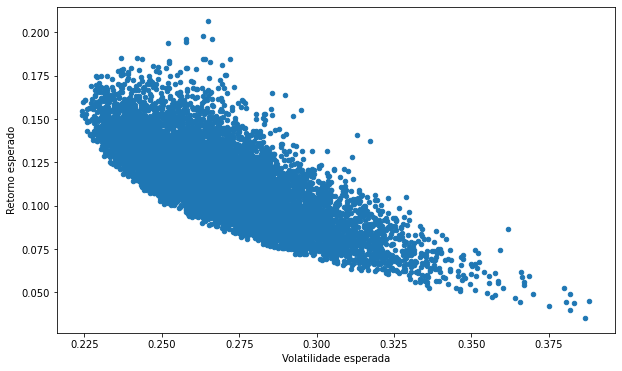

In [364]:
portfolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(10,6))
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

<function matplotlib.pyplot.show>

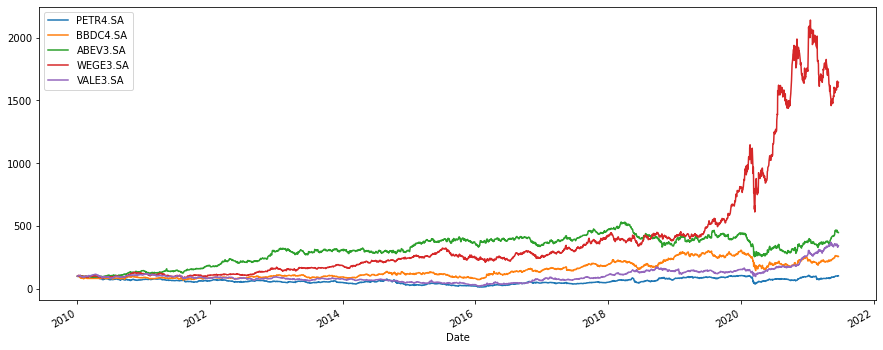

In [365]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

<function matplotlib.pyplot.show>

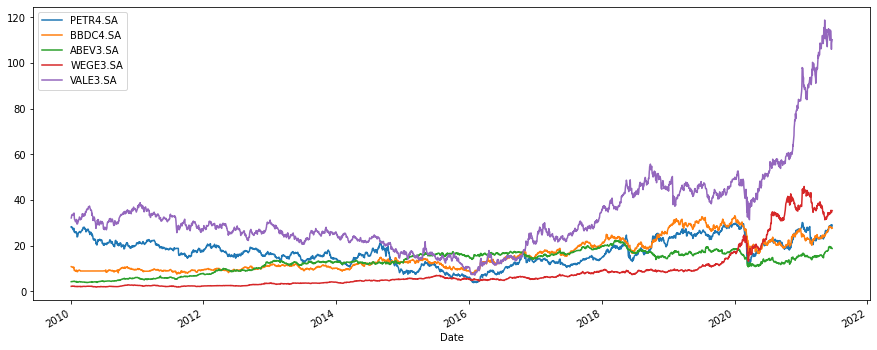

In [366]:
bolsas.plot(figsize = (15, 6));
plt.show

# CAPM

### Medindo o Beta
### Mede o risco de mercado que não pode ser evitado através da diversificação.
### Quanto mais volátil uma ação, maior seu beta. O beta varia entre -1 e 2.
### B = 0 nenhuma relação; B < 1 defensiva; B > 1 agressiva
### Ações defensivas perdem menos quando a economia está mal e ganham menos quando estão bem; agressivas são o oposto.

In [367]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [368]:
sec_returns = np.log( data / data.shift(1))

In [369]:
cov = sec_returns.cov() * 250
cov

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,0.290645,0.127447,0.059380,0.069724,0.128778,0.115639
BBDC4.SA,0.127447,0.144017,0.052306,0.051400,0.072504,0.086321
ABEV3.SA,0.059380,0.052306,0.078153,0.040230,0.037345,0.045963
WEGE3.SA,0.069724,0.051400,0.040230,0.125119,0.042079,0.052815
VALE3.SA,0.128778,0.072504,0.037345,0.042079,0.241928,0.079755
^BVSP,0.115639,0.086321,0.045963,0.052815,0.079755,0.072849


In [370]:
# Covariação da primeira ação com o mercado.

cov_with_market = cov.iloc[0,5]
cov_with_market

0.1156390057792526

In [371]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07284938427602719

In [372]:
logn_beta = cov_with_market / market_var
logn_beta

1.5873710797759801

In [373]:
# Covariação da seegunda ação com o mercado.

cov_with_market = cov.iloc[1,5]
cov_with_market

0.08632052682638632

In [374]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07284938427602719

In [375]:
vvar_beta = cov_with_market / market_var
vvar_beta

1.1849177269545177

# Modelo de Precificação de Ativos Financeiros (CAPM)

### Ação livre de risco = retorno de 2,5%.
### Beta
### Prêmio de risco das ações = entre 4,5% e 5,5%
### Retorno esperado para valer a pena investir na ação


In [376]:
logn_er = 0.025 + logn_beta * 0.05
logn_er

0.10436855398879902

In [377]:
vvar_beta = 0.025 + vvar_beta * 0.05
vvar_beta

0.0842458863477259

### Se o retorno ficar abaixo do calculado, não vale a pena investir nessa ação.

# Índice de Sharp
## Decidir o melhor portfólio em termos de risco e retorno

In [378]:
sharpe_logn = (logn_er - 0.025) / (sec_returns['PETR4.SA'].std() * 250 ** 0.5)
sharpe_logn

0.14721997763904335

In [379]:
sharpe_vvar = (logn_er - 0.025) / (sec_returns['BBDC4.SA'].std() * 250 ** 0.5)
sharpe_vvar

0.20914221587425225

# Simulações de Monte Carlo
### Observar os possíveis diferentes resultados de um evento futuro
### 1 - Prever o preço da ação

In [380]:
log_returns_1 = np.log(1 + data['BBDC4.SA'].pct_change())

In [381]:
log_returns_1.tail()

Date
2021-06-15    0.000716
2021-06-16    0.004998
2021-06-17   -0.004283
2021-06-18   -0.018409
2021-06-21    0.007983
Name: BBDC4.SA, dtype: float64

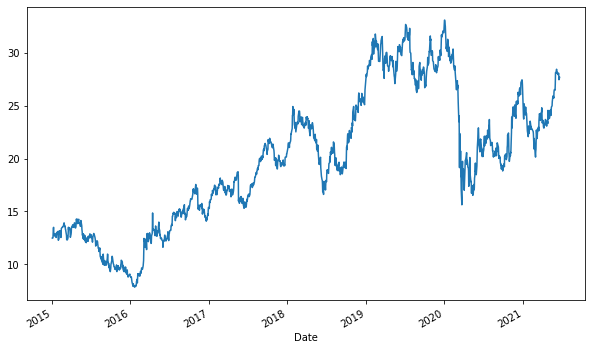

In [382]:
data['BBDC4.SA'].plot(figsize=(10,6))

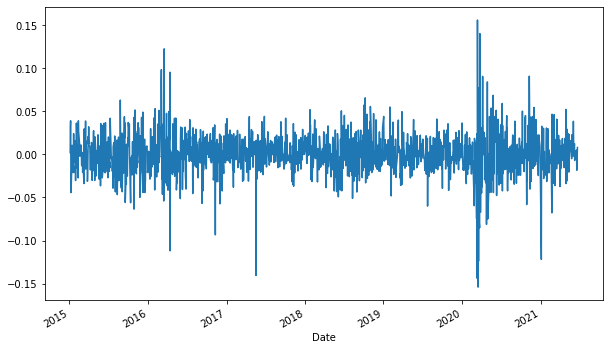

In [383]:
log_returns_1.plot(figsize=(10,6))

In [384]:
u = log_returns_1.mean()
u

0.0004971367925859643

In [385]:
var = log_returns_1.var()
var

0.0005760676894398897

In [386]:
drift = u - (0.5 * var)
drift

0.00020910294786601947

In [387]:
stdev = log_returns_1.std()
stdev

0.024001410155236498

In [388]:
type(drift)

float

In [389]:
type(stdev)

float

In [390]:
np.array(drift)

array(0.0002091)

In [391]:
np.array(stdev)

array(0.02400141)

In [392]:
norm.ppf(0.95)

1.6448536269514722

In [393]:
x = np.random.rand(10,2)
x

array([[0.20565443, 0.99918815],
       [0.20410069, 0.75436684],
       [0.57633272, 0.56514596],
       [0.0711915 , 0.41843606],
       [0.26890551, 0.89254396],
       [0.58079869, 0.14125766],
       [0.29333876, 0.3437061 ],
       [0.40128261, 0.99449336],
       [0.07363145, 0.1989553 ],
       [0.57295072, 0.91526497]])

In [394]:
norm.ppf(x)

array([[-0.82159251,  3.15161483],
       [-0.82706296,  0.68829611],
       [ 0.19252044,  0.16402929],
       [-1.46697449, -0.20589605],
       [-0.61612651,  1.24017117],
       [ 0.20393714, -1.07468605],
       [-0.54365701, -0.40236939],
       [-0.2500286 ,  2.54227699],
       [-1.44926747, -0.84535871],
       [ 0.18389152,  1.37390862]])

In [395]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.19237661, -0.30973996],
       [-1.14840974, -0.77614542],
       [ 0.75861174, -0.58167035],
       [ 0.21999955,  1.65377427],
       [ 0.79064579, -0.8505572 ],
       [-0.67162813, -1.71831076],
       [ 0.65970694, -0.32876046],
       [ 1.33294963,  0.64494158],
       [ 0.20615788,  0.4338143 ],
       [ 0.69714006,  0.23093981]])

In [396]:
t_intervals = 100
iterations = 10

In [397]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.98437059, 0.97903473, 0.99811734, 0.98987065, 1.01149616,
        1.00919366, 1.02033   , 0.99015889, 0.99155739, 1.03354316],
       [0.97002179, 1.00639206, 1.01227879, 0.9725588 , 1.00240583,
        1.0095594 , 0.97982935, 0.99513461, 0.98183092, 0.98510085],
       [0.99875164, 1.01434668, 1.02742473, 0.98672771, 1.00212012,
        1.01390849, 0.98798479, 0.97716795, 1.00099184, 1.0183166 ],
       [1.01454428, 1.04119625, 1.01999338, 0.98672084, 1.03223949,
        1.02464355, 0.97283709, 0.99808318, 1.02665883, 0.99043942],
       [0.97724928, 1.02429505, 0.97585804, 1.00066532, 1.01638529,
        0.97148745, 1.04904569, 1.04282038, 1.00677552, 0.99582813],
       [1.02443662, 1.00935754, 0.99674363, 1.02254511, 1.00199016,
        0.9634359 , 0.96820404, 1.00184436, 0.98306456, 1.01168729],
       [0.95442276, 0.97679624, 1.03213273, 0.99202933, 0.98931067,
        1.02085842, 1.01004137, 1.04627709, 0.98787409, 1.014411  ],
       [1.00373664, 1.02000833, 0.9967724

In [398]:
s0 = data['BBDC4.SA'].iloc[-1]
s0

27.670000076293945

In [399]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [400]:
price_list[0] = s0
price_list

array([[27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008,
        27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [401]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [402]:
price_list

array([[27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008,
        27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008],
       [26.84050308, 27.84686843, 28.00975421, 26.91070196, 27.73656947,
        27.93450879, 27.11187827, 27.53537472, 27.16726159, 27.25774061],
       [26.80699636, 28.24637859, 28.77791429, 26.5535353 , 27.79537429,
        28.32303562, 26.78612336, 26.90668568, 27.1942073 , 27.75700972],
       [27.1968848 , 29.41002336, 29.35328209, 26.20092663, 28.69148312,
        29.02101569, 26.05853437, 26.85511031, 27.91917296, 27.49163667],
       [26.57813604, 30.12454147, 28.64463623, 26.21835869, 29.16160129,
        28.19355266, 27.3365931 , 28.00505638, 28.10833974, 27.37694517],
       [27.22761595, 30.4064332 , 28.55135861, 26.80945434, 29.21963756,
        27.16268078, 26.46739977, 28.05670781, 27.63231255, 27.69690738],
       [25.98665632, 29.70088976, 29.46879172, 26.59576497, 28.90729919,
        27.7292513 , 26.73316878, 29.35509052

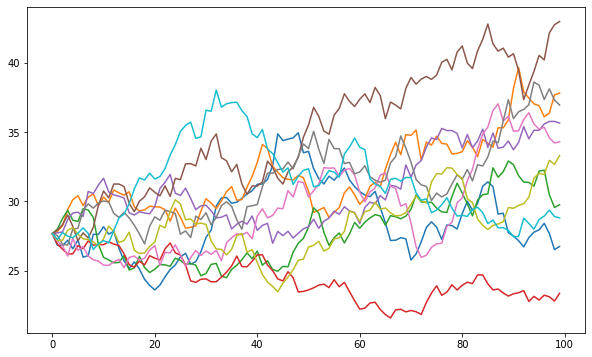

In [403]:
plt.figure(figsize=(10,6))
plt.plot(price_list)